In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
df = pd.read_csv('feature_data.csv')

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# 🔹 Load Data
X = df.drop(columns=["index", "filename", "label", "width", "height"])
y = df["label"].values   # Target variable

# 🔹 Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Convert to PyTorch Tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Ensure it's (N, 1) for BCE loss

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)

# 🔹 Define Neural Network Model
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Only for evaluation (not needed with BCEWithLogitsLoss)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No sigmoid here
        return x

# 🔹 Initialize Model
input_size = X_train.shape[1]
model = BinaryClassifier(input_size)

# 🔹 Define Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss()  # More stable than BCE + Sigmoid
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch [10/1000] - Loss: 0.689815
Epoch [20/1000] - Loss: 0.682153
Epoch [30/1000] - Loss: 0.673565
Epoch [40/1000] - Loss: 0.664147
Epoch [50/1000] - Loss: 0.653268
Epoch [60/1000] - Loss: 0.640919
Epoch [70/1000] - Loss: 0.626629
Epoch [80/1000] - Loss: 0.609284
Epoch [90/1000] - Loss: 0.587592
Epoch [100/1000] - Loss: 0.562034
Epoch [110/1000] - Loss: 0.532574
Epoch [120/1000] - Loss: 0.498859
Epoch [130/1000] - Loss: 0.461172
Epoch [140/1000] - Loss: 0.420361
Epoch [150/1000] - Loss: 0.378175
Epoch [160/1000] - Loss: 0.337330
Epoch [170/1000] - Loss: 0.298207
Epoch [180/1000] - Loss: 0.262586
Epoch [190/1000] - Loss: 0.231812
Epoch [200/1000] - Loss: 0.205175
Epoch [210/1000] - Loss: 0.182610
Epoch [220/1000] - Loss: 0.163149
Epoch [230/1000] - Loss: 0.146313
Epoch [240/1000] - Loss: 0.131633
Epoch [250/1000] - Loss: 0.119007
Epoch [260/1000] - Loss: 0.108103
Epoch [270/1000] - Loss: 0.098701
Epoch [280/1000] - Loss: 0.090562
Epoch [290/1000] - Loss: 0.083473
Epoch [300/1000] - Loss

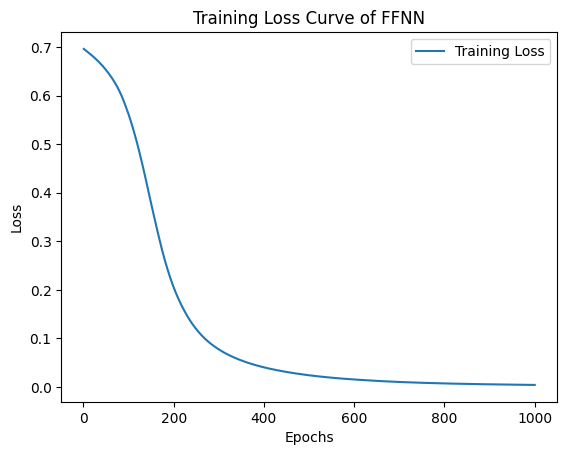

In [34]:
# 🔹 Training Loop
epochs = 1000
losses = []

for epoch in range(epochs):
    model.train()
    
    optimizer.zero_grad()
    outputs = model(X_train)
    
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())  # Store loss

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.6f}")

# Plot the loss curve
plt.plot(range(1, epochs + 1), losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve of FFNN")
plt.legend()
plt.show()



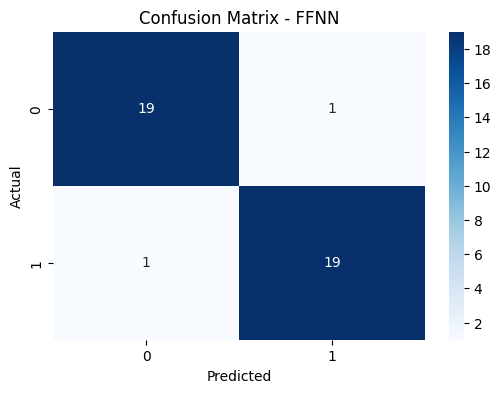

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        20
         1.0       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [38]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    predictions = (torch.sigmoid(test_outputs) > 0.5).float()  # Convert logits to binary predictions

# Convert PyTorch tensors to NumPy
y_test_np = y_test.cpu().numpy()  # Ensure it's on CPU
predictions_np = predictions.cpu().numpy()

# 🔹 Calculate Accuracy
accuracy = accuracy_score(y_test_np, predictions_np)

# 🔹 Confusion Matrix
conf_matrix = confusion_matrix(y_test_np, predictions_np)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - FFNN")
plt.show()

# 🔹 Print Classification Report
print(classification_report(y_test_np, predictions_np))